In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('C:/Users/Pranay/Downloads/activity.csv')

In [3]:
data.head()

,Acc (vertical),LyingDown
0,96.229,0
1,84.746,0
2,82.449,0
3,106.560,0
4,80.152,0


In [4]:
data.describe()

,Acc (vertical),LyingDown
count,494.000000,494.000000
mean,45.512363,0.516194
std,44.799360,0.500244
min,-48.459000,0.000000
25%,0.918650,0.000000
50%,41.109500,1.000000
75%,89.339000,1.000000
max,112.310000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Acc (vertical)  494 non-null    float64
 1   LyingDown       494 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 7.8 KB


In [7]:
X=data['Acc (vertical)']
Y=data['LyingDown']
X_train=X[0:345]
y_train=Y[0:345]
X_test=X[345:]
y_test=Y[345:]
X_train=np.array(X_train).reshape(1,345)
y_train=np.array(y_train).reshape(1,345)
X_test=np.array(X_test).reshape(1,149)
y_test=np.array(y_test).reshape(1,149)

In [8]:
train_size=X_train.shape[1]
test_size=X_test.shape[1]

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train.T).T     #Scaling all training examples
X_test=scaler.fit_transform(X_test.T).T

In [199]:
#Hyperparameters
alpha=0.01
lamd=0.05
Iter=1000
L=2
N=5
m=X_train.shape[1]
Input_feat=1
Output_feat=1

In [200]:
def relu(Z):
    return np.maximum(0, Z)

def sigmoid(X):
    return 1/(1+np.exp(-X))

In [262]:
W=[]                                         #NN matrices and lists
B=[]
Z=[]
A=[]
DZ=[]
DW=[]
DB=[]
G_prime=[]
W_track=[]
W_track2=[]
W_track3=[]
W_track4=[]
W_track5=[]
Cost_track=[]
for i in range(1,L):                         #NN matrices and lists
    if(i==1):
        W.append(np.random.rand(N,Input_feat) * np.sqrt(2/Input_feat))  
    else:
        W.append(np.random.rand(N,N)  * np.sqrt(2/N)) 
    B.append(np.random.rand(N,1))
    Z.append(np.zeros([N,m]))
    A.append(np.zeros([N,m]))
    DZ.append(np.zeros([N,m]))
    DB.append(np.random.rand(N,1))
    if(i==1):
        DW.append(np.random.rand(N,Input_feat))
    else:
        DW.append(np.random.rand(N,N))
    G_prime.append(np.ones([N,train_size]))
Z_test=[]                                     #Prediction variables and lists
A_test=[]
Z_train=[]
A_train=[]
Accuracy_test_track=[]
Accuracy_train_track=[]
Error_train_track=[]
Error_test_track=[]
for i in range(1,L):
    Z_test.append(np.zeros([N,test_size]))
    A_test.append(np.zeros([N,test_size]))
Z0_test=np.random.rand(1,1)
Z7_test=np.zeros([Output_feat,1])
a0_test=X_test
a7_test=np.zeros([Output_feat,1])
A_test.insert(0,a0_test)
A_test.insert(L,a7_test)
Z_test.insert(0,Z0_test)
Z_test.insert(L,Z7_test)
for i in range(1,L):
    Z_train.append(np.zeros([N,m]))
    A_train.append(np.zeros([N,m]))
Z0_train=np.random.rand(1,1)
Z7_train=np.zeros([Output_feat,1])
a0_train=X_train
a7_train=np.zeros([Output_feat,1])
A_train.insert(0,a0_train)
A_train.insert(L,a7_train)
Z_train.insert(0,Z0_train)
Z_train.insert(L,Z7_train)
W0=np.random.rand(2,2)                               #Creating first and last layer
W7=np.random.rand(Output_feat,N) 
b0=np.random.rand(1,1)
b7=np.random.rand(Output_feat,1)
Z0=np.random.rand(1,1)
a0=X_train
Z7=np.zeros([Output_feat,1])
a7=np.zeros([Output_feat,1])
Db0=np.random.rand(1,1)
Db7=np.random.rand(Output_feat,1)
DZ0=np.random.rand(1,1)
DZ7=np.zeros([Output_feat,1])
DW0=np.random.rand(2,2)
DW7=np.random.rand(Output_feat,N)
G_prime0=np.zeros([N,N])
G_prime7=np.zeros([N,train_size])
W.insert(0,W0)                            #Adding first and last layer to the neural net
W.insert(L,W7)
B.insert(0,b0)
B.insert(L,b7)
Z.insert(0,Z0)
Z.insert(L,Z7)
A.insert(0,a0)
A.insert(L,a7)
DW.insert(0,DW0)
DW.insert(L,DW7)
DB.insert(0,Db0)
DB.insert(L,Db7)
DZ.insert(0,DZ0)
DZ.insert(L,DZ7)
G_prime.insert(0,G_prime0)
G_prime.insert(L,G_prime7)
W_initial=W
B_initial=B
#W=W_initial
#B=B_initial

In [263]:
%%time
#Forward Propogation
max_accuracy = 0.0
best_weights = None
best_biases = None
for l in range(0,1000):                    #Activation functions can be customized using for loops
    for i in range(1,L+1):
        if(i==L):
            Z[i]=np.dot(W[i],A[i-1]) + B[i]
            A[i]=sigmoid(Z[i])
        else:
            Z[i]=np.dot(W[i],A[i-1]) + B[i]
            A[i]=relu(Z[i])
    Cost = -(1/m) * np.sum(y_train * np.log(A[L]) + (1 - y_train) * np.log(1 - A[L]))
    Cost_track.append(Cost)
   #Back Propogation
    for i in reversed(range(1,L+1)):
        if(i==L):
            DZ[i]=(A[i] - y_train)  
            DW[i]= 1/m * (np.dot(DZ[i],A[i-1].T))
            DW[i]=DW[i] + ((lamd/m) * W[i])
            DB[i]= 1/m * (np.sum(DZ[i],axis=1,keepdims=True))
            W[i]= W[i]- (alpha*DW[i])
            B[i]= B[i]- (alpha*DB[i])
        else:
            #G_prime[i] = A[i] * (1 - A[i]) #sigmoid
            G_prime[i]= np.where(Z[i] > 0, 1, 0) #Relu
            DZ[i] = np.dot(W[i+1].T, DZ[i+1]) * G_prime[i]
            #DZ[i]= np.dot(W[i+1].T,(DZ[i+1])) *  G_prime[i]
            DW[i]= 1/m * np.dot(DZ[i],A[i-1].T)
            DW[i]=DW[i] + ((lamd/m) * W[i])
            DB[i]= 1/m * (np.sum(DZ[i],axis=1,keepdims=True))
            W[i]= W[i]- (alpha*DW[i])
            B[i]= B[i]- (alpha*DB[i])
    W_track.append(W[L][0][0])
    W_track2.append(W[L][0][1])
    W_track3.append(W[L][0][2])
    W_track4.append(W[L][0][3])
    W_track5.append(W[L][0][4])
        #Predicting using parameters
    for i in range(1,L+1):
        Z_test[i]=np.dot(W[i],A_test[i-1])+B[i]
        A_test[i]=sigmoid(Z_test[i])
        Z_train[i]=np.dot(W[i],A_train[i-1])+B[i]
        A_train[i]=sigmoid(Z_train[i])
    for i in range(0,test_size):
        if A_test[L][0][i]>0.5:
            A_test[L][0][i]=1
        else:
            A_test[L][0][i]=0
    for i in range(0,train_size):
        if A_train[L][0][i]>0.5:
            A_train[L][0][i]=1
        else:
            A_train[L][0][i]=0
    Accuracy_test=((test_size-np.sum(np.abs(A_test[L]-y_test)))/test_size)*100 #Accuracy of test set
    Accuracy_train=((train_size-np.sum(np.abs(A_train[L]-y_train)))/train_size)*100 #Accuracy of train set
    Accuracy_test_track.append(Accuracy_test)
    Accuracy_train_track.append(Accuracy_train)
    Error_test_track.append((np.sum(np.abs(A_test[L]-y_test))/test_size) * 100)
    Error_train_track.append((np.sum(np.abs(A_train[L]-y_train))/train_size)*100)
    if Accuracy_test >= max_accuracy:
        max_accuracy = Accuracy_test
        best_weights = W.copy()  # Make a copy of the weights
        best_biases = B.copy()  # Make a copy of the biases
    else:
        break
W = best_weights      #Selecting best weights and biases
B = best_biases
print(l)   

628
CPU times: total: 344 ms
Wall time: 342 ms


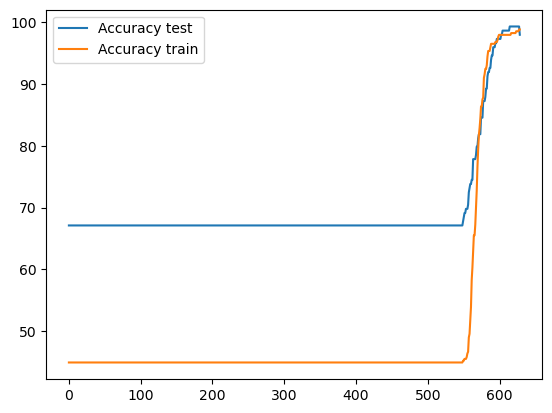

In [264]:
plt.plot( Accuracy_test_track, label='Accuracy test')
plt.plot( Accuracy_train_track, label='Accuracy train')
plt.legend()
plt.show()

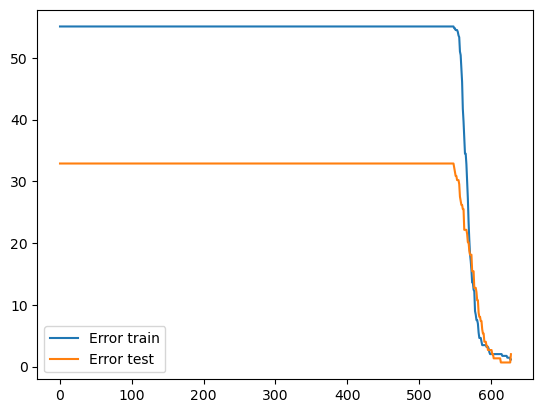

In [265]:
plt.plot( Error_train_track, label='Error train')
plt.plot( Error_test_track, label='Error test')
plt.legend()
plt.show()

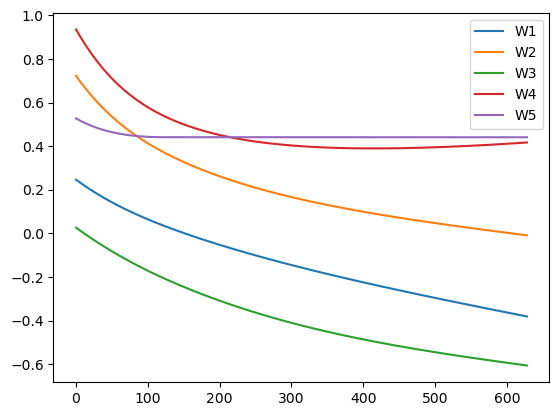

In [266]:
plt.plot(W_track,label='W1')
plt.plot(W_track2,label='W2')
plt.plot(W_track3,label='W3')
plt.plot(W_track4,label='W4')
plt.plot(W_track5,label='W5')
plt.legend()
plt.show()

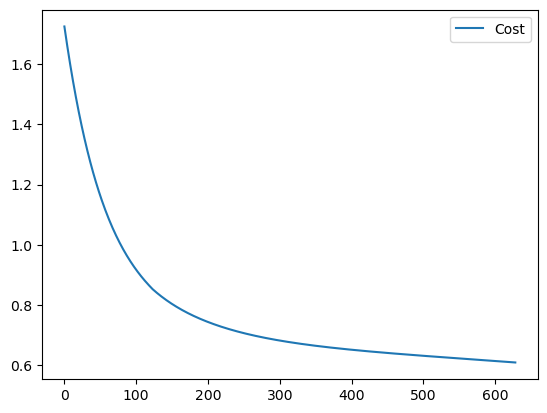

In [267]:
plt.plot(Cost_track,label='Cost')
plt.legend()
plt.show()

In [279]:
for i in range(1,L+1):               #Calculating accuracy with best weights and biases
        Z_test[i]=np.dot(W[i],A_test[i-1])+B[i]
        A_test[i]=sigmoid(Z_test[i])
        Z_train[i]=np.dot(W[i],A_train[i-1])+B[i]
        A_train[i]=sigmoid(Z_train[i])
for i in range(0,test_size):
        if A_test[L][0][i]>0.5:
            A_test[L][0][i]=1
        else:
            A_test[L][0][i]=0
for i in range(0,train_size):
        if A_train[L][0][i]>0.5:
            A_train[L][0][i]=1
        else:
            A_train[L][0][i]=0
Accuracy_test=((test_size-np.sum(np.abs(A_test[L]-y_test)))/test_size)*100 #Accuracy of test set
Accuracy_train=((train_size-np.sum(np.abs(A_train[L]-y_train)))/train_size)*100 #Accuracy of train set

In [280]:
TP_test = np.sum(np.logical_and(A_test[L] == 1, y_test == 1))
FP_test = np.sum(np.logical_and(A_test[L] == 1, y_test == 0))
FN_test = np.sum(np.logical_and(A_test[L] == 0, y_test == 1))

TP_train = np.sum(np.logical_and(A_train[L] == 1, y_train == 1))
FP_train = np.sum(np.logical_and(A_train[L] == 1, y_train == 0))
FN_train = np.sum(np.logical_and(A_train[L] == 0, y_train == 1))

precision_test = TP_test / (TP_test + FP_test)
recall_test = TP_test / (TP_test + FN_test)

precision_train = TP_train / (TP_train + FP_train)
recall_train = TP_train / (TP_train + FN_train)

In [281]:
precision_test

0.9900990099009901

In [282]:
recall_test

1.0

In [283]:
Accuracy_test

99.32885906040269

In [284]:
max(Accuracy_test_track)

99.32885906040269

In [285]:
Accuracy_test

99.32885906040269

In [286]:
Accuracy_train

98.84057971014492